In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import learning_curve

In [68]:
weather_data = pd.read_csv("weather.csv")
selected_features = [
    "tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike",
    "dew", "humidity", "precip", "windspeed", "windgust", "sealevelpressure",
    "cloudcover", "visibility", "solarradiation"
]

In [70]:
weather_data

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Hyderabad,2022-01-01,25.6,17.0,21.0,25.6,17.0,21.0,17.2,79.8,...,15.9,8,NaN,2022-01-01T06:46:22,2022-01-01T17:52:54,0.95,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
1,Hyderabad,2022-01-02,26.0,17.9,21.1,26.0,17.9,21.1,16.8,78.1,...,15.2,7,NaN,2022-01-02T06:46:43,2022-01-02T17:53:29,0.98,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
2,Hyderabad,2022-01-03,26.0,15.3,20.9,26.0,15.3,20.9,15.5,72.8,...,18.9,8,NaN,2022-01-03T06:47:02,2022-01-03T17:54:06,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
3,Hyderabad,2022-01-04,26.9,14.3,20.9,27.2,14.3,20.9,15.0,70.9,...,19.2,8,NaN,2022-01-04T06:47:21,2022-01-04T17:54:42,0.05,Clear,Clear conditions throughout the day.,clear-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
4,Hyderabad,2022-01-05,27.4,16.0,21.1,27.5,16.0,21.1,14.9,69.6,...,18.6,8,NaN,2022-01-05T06:47:39,2022-01-05T17:55:19,0.08,Clear,Clear conditions throughout the day.,clear-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Hyderabad,2024-09-16,29.2,22.0,25.5,31.8,22.0,26.2,20.5,74.5,...,23.9,10,10.0,2024-09-16T06:04:17,2024-09-16T18:17:22,0.44,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
990,Hyderabad,2024-09-17,30.7,22.0,26.2,33.3,22.0,27.2,20.7,73.2,...,24.2,10,10.0,2024-09-17T06:04:25,2024-09-17T18:16:31,0.47,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
991,Hyderabad,2024-09-18,31.5,22.0,26.6,34.7,22.0,27.4,19.9,68.3,...,25.8,10,10.0,2024-09-18T06:04:33,2024-09-18T18:15:41,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999"
992,Hyderabad,2024-09-19,33.0,22.0,27.2,36.2,22.0,28.3,20.1,66.5,...,24.6,10,10.0,2024-09-19T06:04:41,2024-09-19T18:14:50,0.54,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOHY,43083099999,43128599999,VOHS,43128099999,..."


In [72]:
weather_data_filtered = weather_data[selected_features].dropna()

In [74]:
weather_data_filtered

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,windspeed,windgust,sealevelpressure,cloudcover,visibility,solarradiation
0,25.6,17.0,21.0,25.6,17.0,21.0,17.2,79.8,0.0,14.8,26.6,1020.3,36.3,4.4,184.5
1,26.0,17.9,21.1,26.0,17.9,21.1,16.8,78.1,0.0,11.2,24.5,1018.8,46.2,4.5,177.4
2,26.0,15.3,20.9,26.0,15.3,20.9,15.5,72.8,0.0,10.3,24.1,1017.8,31.1,5.1,219.1
3,26.9,14.3,20.9,27.2,14.3,20.9,15.0,70.9,0.0,13.9,26.3,1017.9,6.7,5.1,221.5
4,27.4,16.0,21.1,27.5,16.0,21.1,14.9,69.6,0.0,16.6,22.7,1017.5,14.5,5.3,213.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,29.2,22.0,25.5,31.8,22.0,26.2,20.5,74.5,0.0,21.4,44.6,1009.3,61.5,5.4,277.8
990,30.7,22.0,26.2,33.3,22.0,27.2,20.7,73.2,0.0,25.9,38.9,1009.0,47.0,5.5,279.3
991,31.5,22.0,26.6,34.7,22.0,27.4,19.9,68.3,0.0,22.3,29.5,1008.2,40.6,5.9,297.8
992,33.0,22.0,27.2,36.2,22.0,28.3,20.1,66.5,0.0,20.3,20.9,1008.6,49.2,6.6,283.3


In [76]:
X = weather_data_filtered.drop(columns=["temp"]).values
y = weather_data_filtered["temp"].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [82]:
y_pred = ridge_model.predict(X_test)

In [84]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.0849
R² Score: 0.9897


In [86]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Temperature')

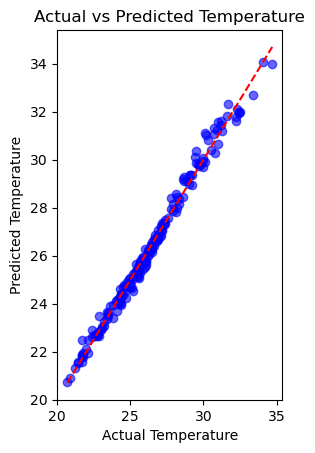

In [88]:
#Actual vs Predicted Temperature
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")

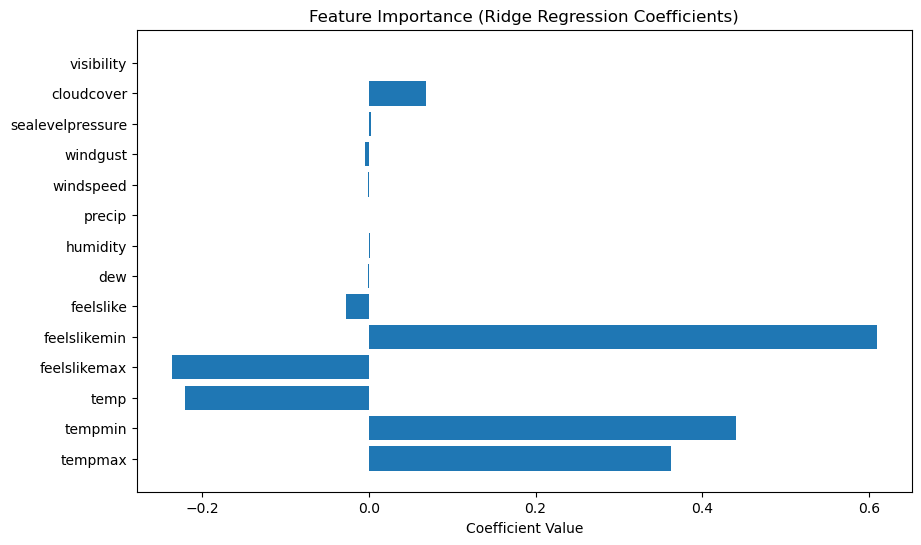

In [90]:
# Feature Importance Plot
feature_names = selected_features[:len(ridge_model.coef_)]
coefficients = ridge_model.coef_
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Ridge Regression Coefficients)")
plt.show()

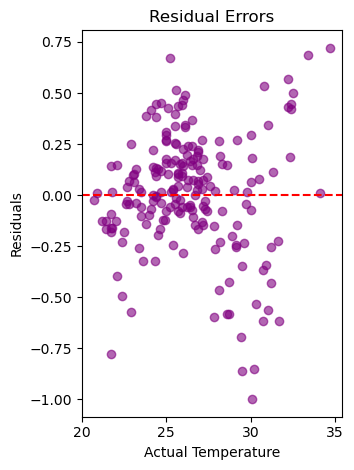

In [92]:
#Residual Errors
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Temperature")
plt.ylabel("Residuals")
plt.title("Residual Errors")
plt.tight_layout()
plt.show()

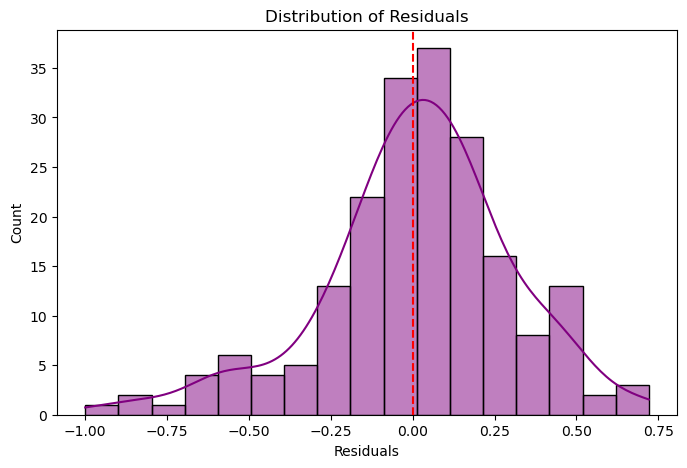

In [94]:
# Distribution of Residuals
plt.figure(figsize=(8, 5))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

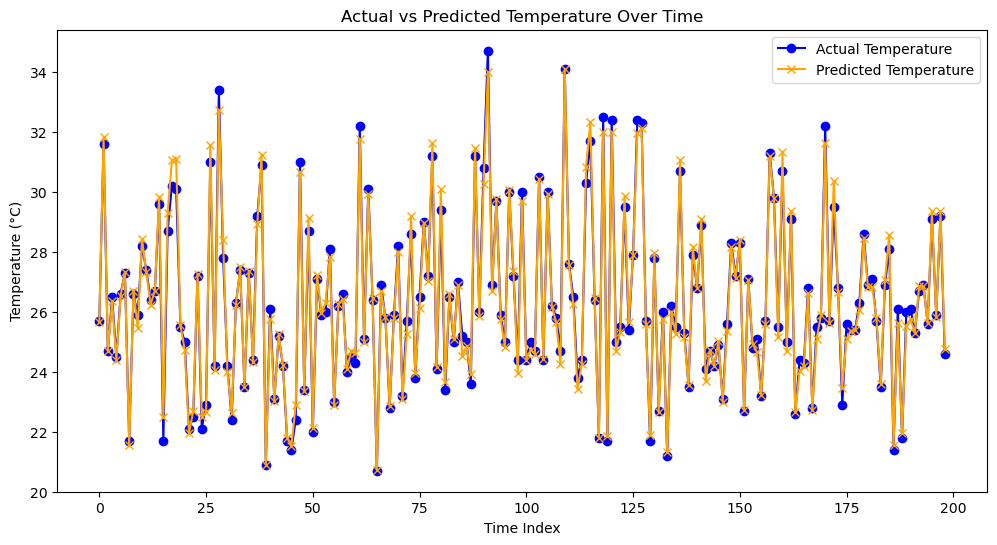

In [96]:
#Time Series Plot (Actual vs Predicted Temperature)
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Temperature', color='blue', marker='o')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Temperature', color='orange', marker='x')
plt.xlabel("Time Index")
plt.ylabel("Temperature (°C)")
plt.title("Actual vs Predicted Temperature Over Time")
plt.legend()
plt.show()

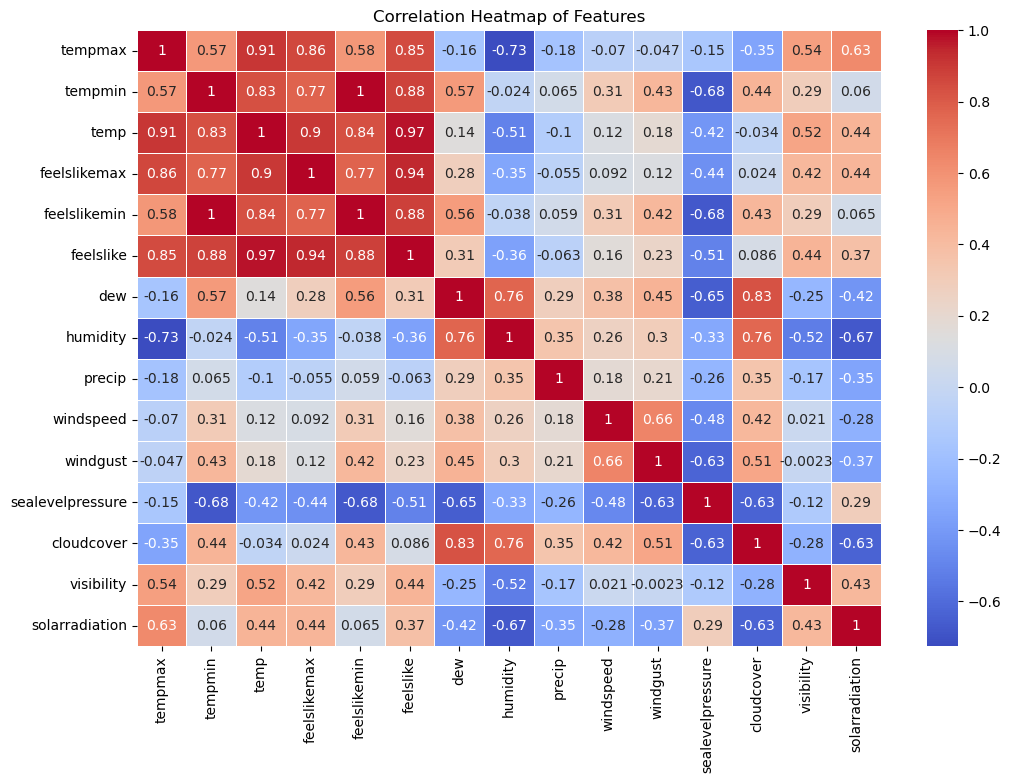

In [98]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = weather_data_filtered.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

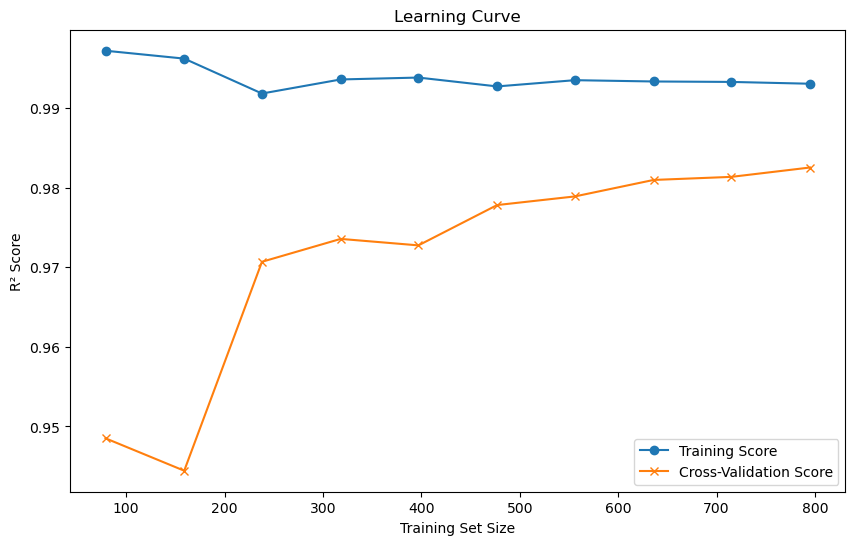

In [100]:
#Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    ridge_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='r2', random_state=42)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', marker='x')
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [102]:
future_data = np.array([[29.0, 19.0, 29.5, 19.5, 26.2, 18.0, 65.0, 0.2, 15.0, 20.0, 1015.0, 50.0, 10.0, 200.0]])
future_temp_prediction = ridge_model.predict(future_data)
print(f"Predicted Temperature for the future date: {future_temp_prediction[0]:.2f} °C")

Predicted Temperature for the future date: 25.38 °C


In [104]:
future_data = np.array([[30.0, 20.0, 28.5, 20.5, 27.5, 18.0, 62.0, 0.4, 25.0, 26.0, 1028.0, 55.0, 20.0, 250.0]])
future_temp_prediction = ridge_model.predict(future_data)
print(f"Predicted Temperature for the future date: {future_temp_prediction[0]:.2f} °C")

Predicted Temperature for the future date: 27.60 °C
